In [1]:
# Import the required libraries.

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np
import datetime as dt
import gmplot 
import os
import scipy.stats
from itertools import combinations

In [2]:
# Read in the processed csv file created during data wrangling phase of project.

dataset=pd.read_csv('C:/Users/andre/Desktop/citibiki-wrangled-data.csv')

In [3]:
# Add 'trip' column to the data set. String format ('start station id' to 'end station id').
# Add 'age column' to the data set. 2019 minus 'birth year'.

dataset['trip']=dataset['start station id'].map(str) +" to " + dataset['end station id'].map(str)
dataset['age']=2019-dataset['birth year']

In [4]:
#############################################################################################################################

In [5]:
# Trip Frequency Analysis Function. 
#
# Input: df - a data frame with the same format and columns as the 'dataset' data frame created during data wrangling but with
#             a column for'start station id' ' to ' 'end station id'  ('trip').
# Output: freq - a data frame that contains the following columns:
#
# 1. the number of times that the trip was taken ('frequency').

def tripfreq(df):
        
    # Calculate how many times each trip was taken ('frequency') and sort by decreasing trip frequency. 
    
    freq=df['trip'].value_counts()
    freq=pd.DataFrame(freq)
    freq=freq.reset_index()
    freq.columns=['trip', 'frequency']
    freq.sort_values('frequency',ascending=False,inplace=True)
    freq=freq.reset_index()
    freq=freq.drop('index', axis=1) 
    
    return(freq)


In [6]:
# Station Volume Analysis Function.
#
# Input: df - a data frame with the same format and columns as the 'dataset' data frame created during data wrangling.
# 
# Output: volume - a data frame that contains the following columns:
#          
# 1. The identification number of the station ('station id').
# 2. Total number of "trip starts" that occured at each station ('ss volume').
# 3. Total number of "trip stops"  that occured at each station ('es volume').
# 4. Total number of "trip starts" and "trip stops" at each station ('total volume'= 'ss volume' + 'es volume').

def stationvolume(df):
    
    # Calculate the 'ss volume'.
    
    spoint = df['start station id'].value_counts()
    spoint=pd.DataFrame(spoint)
    spoint=spoint.reset_index()
    spoint.columns=['start station id', 'ss volume']

    # Calculate the 'es volume'.
    
    epoint = df['end station id'].value_counts()
    epoint=pd.DataFrame(epoint)
    epoint=epoint.reset_index()
    epoint.columns=['end station id', 'es volume']

    # Merge the 'ss volume' and 'es volume' data frames.
    
    volume=pd.merge(spoint,epoint, left_on='start station id', right_on='end station id')
    
    # Calculate the 'total volume' 
    
    volume['total volume']=volume['ss volume'] + volume['es volume']
        
    # Clean up the data frame and sort descending based on 'total volume'.
    
    volume=volume.sort_values('total volume', ascending=False)
    volume.rename(columns={'start station id':'station id'}, inplace=True)
    volume.reset_index(inplace=True)
    volume.drop('index', axis=1, inplace = True)
    volume.drop('end station id', axis=1, inplace = True)
    
    return(volume)


In [7]:
#############################################################################################################################

In [8]:
# 70% of the trips were taken by males and 23% of the trips were taken by females. 
# The gender of the rider is 'unknown' for the remaining 7% of the trips.
# (male = 1, female = 2, unknown = 0)

dataset['gender'].value_counts()

1    6264533
2    2079228
0     614560
Name: gender, dtype: int64

In [9]:
# 11.5% of the trips were taken by 'Customer' and 88.5% of the trips were taken by 'Subscriber'. 

dataset['usertype'].value_counts()

Subscriber    7926815
Customer      1031506
Name: usertype, dtype: int64

In [10]:
# Create three data sets. One data set for Male and one for Female and one for "Unknown" gender.

Mdata = dataset[dataset['gender']==1]
Fdata = dataset[dataset['gender']==2]
Udata = dataset[dataset['gender']==0]

In [11]:
# 94% of the male trips taken by subscribers and 6% of the male trips were taken by customers. 

Mdata['usertype'].value_counts()

Subscriber    5901493
Customer       363040
Name: usertype, dtype: int64

In [12]:
# 90.5% of the female trips taken by subscribers and 9.5% of the female trips were taken by customers. 

Fdata['usertype'].value_counts()

Subscriber    1881309
Customer       197919
Name: usertype, dtype: int64

In [13]:
# 23% of the "unknown" gender trips were taken by Subscribers and 77%  of the "unknown" gender trips were taken by Customers.

Udata['usertype'].value_counts()

Customer      470547
Subscriber    144013
Name: usertype, dtype: int64

In [14]:
# Generate data sets of the unique combinations of 'usertype' and 'gender'

MdataS=Mdata[Mdata['usertype']=='Subscriber']
MdataC=Mdata[Mdata['usertype']=='Customer']
FdataS=Fdata[Fdata['usertype']=='Subscriber']
FdataC=Fdata[Fdata['usertype']=='Customer']
UdataS=Udata[Udata['usertype']=='Subscriber']
UdataC=Udata[Udata['usertype']=='Customer']

In [15]:
# Generate data sets for each value of 'usertype' 

Cdata = dataset[dataset['usertype']=='Customer']
Sdata = dataset[dataset['usertype']=='Subscriber']

Text(0.5, 1.0, 'All Trips')

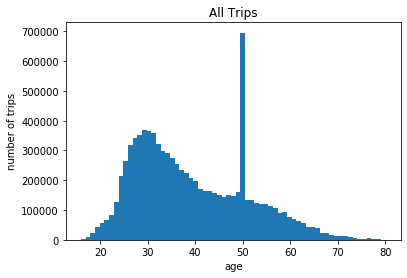

In [16]:
# Histogram of age for all trips taken. This histogram shows that there are just under 700,000 trips taken by 50 year olds. 
# However, trips taken by 49 year olds and 51 year olds are at around 160,000 and 135,000 respectively. 
# Trips taken for all other ages are below 400,000.

plt.hist(dataset['age'],bins=65);
plt.xlabel('age')
plt.ylabel('number of trips')
plt.title('All Trips')

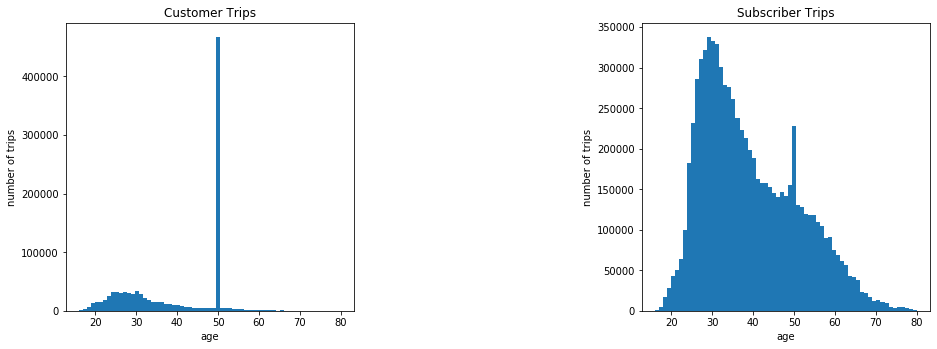

In [17]:
# Histograms of age for Customer and Subscriber trips are plotted.

# The customer trips histogram shows approximately 470,000 trips taken by 50 year olds. However, trips taken by 49 year olds 
# and 51 year olds are at around 5100 and 5000 respectively. Trips taken for all other ages are below 35,000.

# The subscriber trips histogram shows approximately 230,000 trips taken by 50 year olds. However, trips taken by 49 year olds
# and 51 year olds are at around 150,000 and 130,000 respectively. Trips taken for all other ages are below 350,000.

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

ax1.hist(Cdata['age'],bins=65);
ax1.set_title('Customer Trips')
ax1.set_xlabel('age')
ax1.set_ylabel('number of trips')

ax2.hist(Sdata['age'],bins=65);
ax2.set_title('Subscriber Trips')
ax2.set_xlabel('age')
ax2.set_ylabel('number of trips')

plt.subplots_adjust(top=2, bottom=1, left=1, right=3, hspace=0.5, wspace=1)

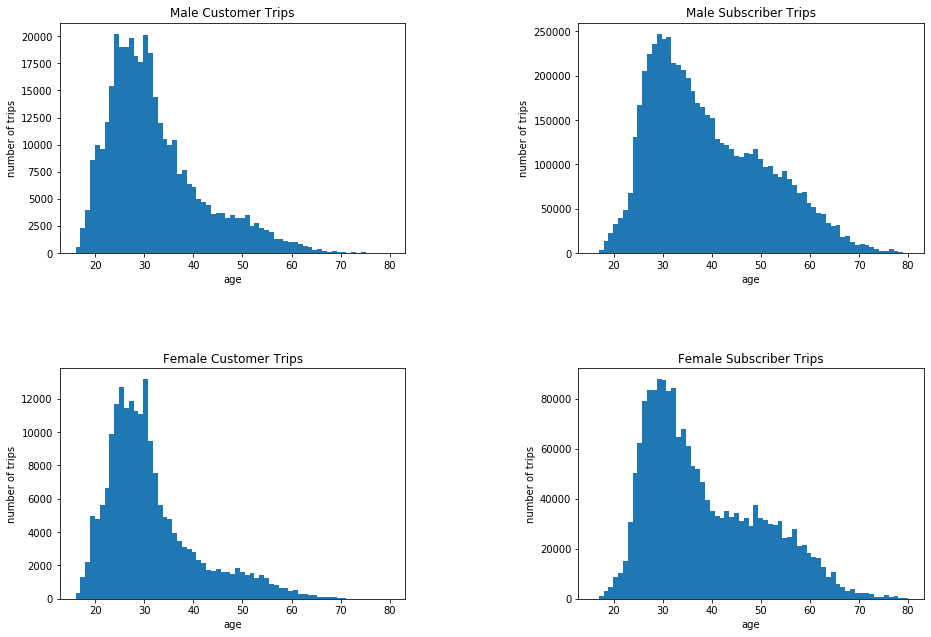

In [18]:
# Histograms of the Male Customer trips, Male Subscriber trips, Female Customer trips and Female Subscriber trips are plotted 
# below.

# The two customer histograms have a similar shape and the two subscriber histograms have a similar shape.
# The number of 50 year old trips in each of these four plots is in alignment with trips taken by similar ages and 
# not disproportionately larger than the number of trips by people of all other ages.

fig, axs = plt.subplots(2, 2)

axs[0, 0].hist(MdataC['age'],bins=65);
axs[0, 0].set_title('Male Customer Trips')
axs[0, 0].set_xlabel('age')
axs[0, 0].set_ylabel('number of trips')

axs[0, 1].hist(MdataS['age'],bins=65);
axs[0, 1].set_title('Male Subscriber Trips')
axs[0, 1].set_xlabel('age')
axs[0, 1].set_ylabel('number of trips')

axs[1, 0].hist(FdataC['age'],bins=65);
axs[1, 0].set_title('Female Customer Trips')
axs[1, 0].set_xlabel('age')
axs[1, 0].set_ylabel('number of trips')

axs[1, 1].hist(FdataS['age'],bins=65);
axs[1, 1].set_title('Female Subscriber Trips')
axs[1, 1].set_xlabel('age')
axs[1, 1].set_ylabel('number of trips')

plt.subplots_adjust(top=4, bottom=2, left=1, right=3, hspace=0.5, wspace=0.5)

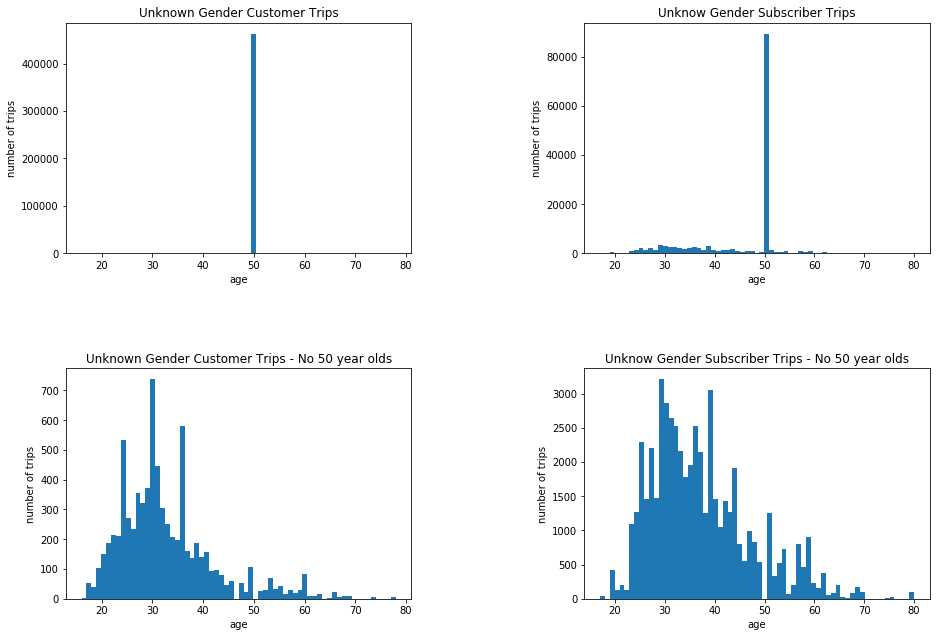

In [19]:
# Histograms of the Unknown Gender Customer trips and Unknown Gender Subscriber trips are plotted below.

# The customer histogram only shows the bar for trips taken by 50 year olds and it indicates well over 400,000 trips. 
# The subscriber histogram shows that there are over 80,000 trips taken by subscribers. The bars for all other ages are barely
# visible on the subscriber histogram.

# Histograms of the Unknown Gender Customer and Unknown Gender Subscriber are re-plotted below with 50 year olds removed.
# Although some ages have disproportionately greater counts than others, the shapes of these plots are similar to the 
# customer and subscriber plots previously created for males and females.

fig, axs = plt.subplots(2, 2)

axs[0, 0].hist(UdataC['age'],bins=65);
axs[0, 0].set_title('Unknown Gender Customer Trips')
axs[0, 0].set_xlabel('age')
axs[0, 0].set_ylabel('number of trips')

axs[0, 1].hist(UdataS['age'],bins=65);
axs[0, 1].set_title('Unknow Gender Subscriber Trips')
axs[0, 1].set_xlabel('age')
axs[0, 1].set_ylabel('number of trips')

axs[1, 0].hist(UdataC[UdataC['age']!=50]['age'],bins=64);
axs[1, 0].set_title('Unknown Gender Customer Trips - No 50 year olds')
axs[1, 0].set_xlabel('age')
axs[1, 0].set_ylabel('number of trips')

axs[1, 1].hist(UdataS[UdataS['age']!=50]['age'],bins=64);
axs[1, 1].set_title('Unknow Gender Subscriber Trips - No 50 year olds')
axs[1, 1].set_xlabel('age')
axs[1, 1].set_ylabel('number of trips')

plt.subplots_adjust(top=4, bottom=2, left=1, right=3, hspace=0.5, wspace=0.5)

In [20]:
USfifty=UdataS[(UdataS['age']==50)]
UCfifty=UdataC[(UdataC['age']==50)]

USnotfifty=UdataS[(UdataS['age']!=50)]
UCnotfifty=UdataC[(UdataC['age']!=50)]

In [21]:
print('The number of Unknown Gender Subscriber trips taken by 50 year olds is {}.'.format(USfifty.shape[0]))
print('The number of Unknown Gender Customer trips taken by 50 year olds is {}.'.format(UCfifty.shape[0]))
print('The number of Unknown Gender Subscriber trips taken by riders who are not 50 years old is {}.'.format(USnotfifty.shape[0]))
print('The number of Unknown Gender Customer trips taken bu riders who are not 50 years old is {}.'.format(UCnotfifty.shape[0]))
print('The total number of Unknown Gender Subscriber trips is {}.'.format(UdataS.shape[0]))
print('The total number of Unknown Gender Customer trips {}.'.format(UdataC.shape[0]))
#print(Udata.shape[0])

The number of Unknown Gender Subscriber trips taken by 50 year olds is 89468.
The number of Unknown Gender Customer trips taken by 50 year olds is 462946.
The number of Unknown Gender Subscriber trips taken by riders who are not 50 years old is 54545.
The number of Unknown Gender Customer trips taken bu riders who are not 50 years old is 7601.
The total number of Unknown Gender Subscriber trips is 144013.
The total number of Unknown Gender Customer trips 470547.


In [22]:
# 62% of Unknown Gender Subscribers are 50 years old. No single age group is this highly represented in the Male Subscriber or 
# the Female Subscriber data.

89468/144013

0.6212494705339101

In [23]:
# 98% of unknown Gender Customers are 50 years old. No single age group is this highly represented in the Male Customer or 
# the Female Customer data.

462946/470547

0.9838464595460177

In [24]:
# Decision: Remove all 'Unknown' Gender Customers from data set and from further analysis.

# Rationale: 
# The intent of this project is to perform clustering of trip data to profile stations for marketing purposes.
# Thus, we are interested in knowing the age and gender of the riders who are taking specific trips so that advertisments
# targeting certain age/gender categories can be placed at various stations. It is clear that the number of trips taken 
# by unknown gender riders who are 50 years old is disproportionately high compared to the trips taken by 50 year old males
# and females. There is no real reason for the number of ungendered trips taken by 50 year olds to be so high. 
# It is likely that age has not been properly reported for these trips especially when considering that the gender is listed as
# unknown. Given that the age is highly likely to be incorrectly reported and the gender is unknown, these trips are of 
# limited value for profiling the stations for marketing purposes and should be removed.

In [8]:
# Regenerate the datasets with the 'Unknown' Gender trips removed.

dataset=dataset[dataset['gender']!=0]

In [9]:
Mdata = dataset[dataset['gender']==1]
Fdata = dataset[dataset['gender']==2]

In [10]:
Cdata = dataset[dataset['usertype']=='Customer']
Sdata = dataset[dataset['usertype']=='Subscriber']

In [11]:
MdataS=Mdata[Mdata['usertype']=='Subscriber']
MdataC=Mdata[Mdata['usertype']=='Customer']
FdataS=Fdata[Fdata['usertype']=='Subscriber']
FdataC=Fdata[Fdata['usertype']=='Customer']

In [12]:
# Run Trip Frequency Analysis Function on all data sets.

Dfreqanalysis=tripfreq(dataset)

Cfreqanalysis=tripfreq(Cdata)
Sfreqanalysis=tripfreq(Sdata)

Mfreqanalysis=tripfreq(Mdata)
Ffreqanalysis=tripfreq(Fdata)

MSfreqanalysis=tripfreq(MdataS)
FSfreqanalysis=tripfreq(FdataS)

MCfreqanalysis=tripfreq(MdataC)
FCfreqanalysis=tripfreq(FdataC)


In [13]:
# Run Station Volume Analysis Function on all data sets.

station=stationvolume(dataset)

Cstation=stationvolume(Cdata)
Sstation=stationvolume(Sdata)

Mstation=stationvolume(Mdata)
Fstation=stationvolume(Fdata)

MSstation=stationvolume(MdataS)
FSstation=stationvolume(FdataS)

MCstation=stationvolume(MdataC)
FCstation=stationvolume(FdataC)


In [14]:
# Given the removal of Unknown Gender Trips, the describe() function and a percentile assessment will be applied to the
# station frequencies and the trip frequencies to visualize the data prior to proceeding. 

In [15]:
# Print out shows the 5 stations with the highest 'total volume'. 

station.head()

,station id,ss volume,es volume,total volume
0,519.0,67844,68082,135926
1,402.0,50707,54453,105160
2,3255.0,51565,52288,103853
3,497.0,49914,50717,100631
4,285.0,47903,48599,96502


In [16]:
# Minimum 'total volume' is 10 and Maximum 'total volume' is 135,926.
# Median 'total volume' is 13,521 and Mean 'total volume' is 20,301.

# 25% of the stations (~206 stations) had a 'total volume' that is less than or equal to 6,061.
# 25% of the stations (~206 stations) had a 'total volume' that is greater than 29,783.

station['total volume'].describe()

count       822.000000
mean      20301.121655
std       19287.452781
min          10.000000
25%        6061.000000
50%       13521.500000
75%       29783.500000
max      135926.000000
Name: total volume, dtype: float64

In [17]:
# let's examine percentile values from 80% to 99%

# The top 10% of stations for 'total volume' (84 stations) had a total volume greater than 48,256.
# The top 1% of stations for 'total volume' (9 stations) had a total volume greater than 80,747.

x=[.80,.85,.90,.95,.96,.97,.98,.99]
f=[0,0,0,0,0,0,0,0]

for i,j in enumerate(x):
    f[i] = station['total volume'].quantile(j)
    print(x[i]*100,'%:', f[i])

80.0 %: 35811.000000000015
85.0 %: 40900.650000000016
90.0 %: 48256.29999999999
95.0 %: 57482.699999999946
96.0 %: 60762.19999999993
97.0 %: 67098.23
98.0 %: 73361.96000000005
99.0 %: 80747.10999999999


Text(0, 0.5, 'Frequency')

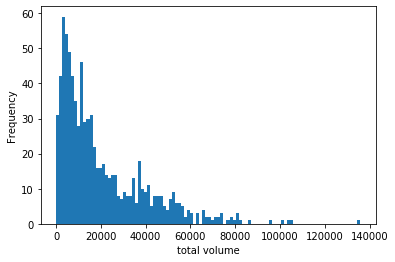

In [18]:
# Let's plot a histogram of the 'total volume'

plt.hist(x=station['total volume'],bins=100);
plt.xlabel('total volume')
plt.ylabel('Frequency')

In [19]:
# Print out shows the 5 trips with the highest 'frequency'. 

Dfreqanalysis.head()

,trip,frequency
0,432.0 to 3263.0,3990
1,519.0 to 492.0,2526
2,3664.0 to 327.0,2338
3,3093.0 to 460.0,2257
4,3118.0 to 3119.0,2176


In [20]:
# The total number of unique trips taken is 300,111 over the six month time frame. 

# Minimum 'frequency' is 1 and Maximum 'frequency' is 3990.
# Median 'frequency' is 5 and Mean 'frequency' is 28.

# 25% of the trips (~75,028 trips) were taken only 1 or 2 times.
# 50% of the trips (~150,056 trips) were taken anywhere from 3 to 21 times.
# 25% of the trips (~75,028 trips) were taken 21 or more times.

Dfreqanalysis['frequency'].describe()

count    300111.000000
mean         27.802250
std          74.091367
min           1.000000
25%           2.000000
50%           5.000000
75%          21.000000
max        3990.000000
Name: frequency, dtype: float64

In [21]:
# let's examine percentile values from 80% to 99.9%

# The top 1% of trips for 'frequency' (3001 trips) were taken more than 335 times.
# The top 0.1% of trips for 'frequency' (300 trips) were taken more than 877 times.

x=[.80,.85,.90,.95,.96,.97,.98,.99,.995,0.999,.9995]
f=[0,0,0,0,0,0,0,0,0,0,0]

for i,j in enumerate(x):
    f[i] = Dfreqanalysis['frequency'].quantile(j)
    print(x[i]*100,'%:', f[i])

80.0 %: 30.0
85.0 %: 44.0
90.0 %: 70.0
95.0 %: 131.0
96.0 %: 153.0
97.0 %: 185.0
98.0 %: 235.0
99.0 %: 335.0
99.5 %: 454.0
99.9 %: 876.7800000000279
99.95 %: 1107.945000000007


In [22]:
# Analysis of the most frequently taken trips.

# The 300 most frequently taken trips will be analysed to see if the groups of riders taking a given trip have mean ages and 
# mean durations that are statistically the same. This analysis will be performed using Welch's two sample t-test. Testing will 
# only be performed for groups of riders who have completed the trip at least 30 times as a large sample size is a requirement 
# of this t-test method.

# The hypothesis for the test are as follows:
# H0: means are the same.
# HA: means are not the same.

In [23]:
# The next five lines generate input data frame that specifies which trips to analyze and the frequency for each rider group
# taking the trip.

tripdf=Dfreqanalysis.head(300)

In [24]:
triplist=tripdf['trip'].tolist()

In [25]:
tripdf=tripdf.merge(Cfreqanalysis[['trip','frequency']], how='left', on='trip')
tripdf=tripdf.merge(Sfreqanalysis[['trip','frequency']], how='left', on='trip')
tripdf=tripdf.merge(Mfreqanalysis[['trip','frequency']], how='left', on='trip')
tripdf=tripdf.merge(Ffreqanalysis[['trip','frequency']], how='left', on='trip')

tripdf=tripdf.merge(MSfreqanalysis[['trip','frequency']], how='left', on='trip')
tripdf=tripdf.merge(FSfreqanalysis[['trip','frequency']], how='left', on='trip')
tripdf=tripdf.merge(MCfreqanalysis[['trip','frequency']], how='left', on='trip')
tripdf=tripdf.merge(FCfreqanalysis[['trip','frequency']], how='left', on='trip')

In [26]:
tripdf.columns=['trip','Total freq','C freq','S freq','M freq','F freq','MS freq', 'FS freq','MC freq', 'FC freq']

In [27]:
tripdf.fillna(0,inplace=True)

In [28]:
# Print out of input data frame that specifies which trips to analyze and the frequency for each rider group taking the trip.

tripdf.head()

,trip,Total freq,C freq,S freq,M freq,F freq,MS freq,FS freq,MC freq,FC freq
0,432.0 to 3263.0,3990,67,3923,2864,1126,2813,1110,51.0,16.0
1,519.0 to 492.0,2526,63,2463,2375,151,2323,140,52.0,11.0
2,3664.0 to 327.0,2338,31,2307,2254,84,2231,76,23.0,8.0
3,3093.0 to 460.0,2257,85,2172,1732,525,1694,478,38.0,47.0
4,3118.0 to 3119.0,2176,73,2103,1792,384,1743,360,49.0,24.0


In [29]:
# Welch's two sample t-test function for analyzing individual trips.

# Inputs: 

# df = tripdf        // dataframe containing the trips to analyze and the trip frequency for each rider group.      
# label1 = 'X freq'  // label for rider group 1 (string).
# label2 = 'Y freq'  // label for rider group 2 (string).
# data1 = Xdata      // dataframe containing trips taken by rider group 1. 
# data2 = Ydata      // dataframe containing trips taken by rider group 2. 

# Output:

# df1                // dataframe containing the results of the testing.   

def stattestfunc(df,label1,label2,data1,data2):
    
    df1=df[['trip', 'Total freq', label1, label2]].copy()
    df1=df1[(df1[label1] > 29) & (df1[label2] > 29)]
    df1['age test']=''
    df1['dura test']=''
    df1['age result']=''
    df1['dura result']=''
    df1list=df1['trip'].tolist()
    print("{} out of {} trips have sufficent data for Welch's t-test.\n".format(len(df1list), df.shape[0]))

    for i,x in enumerate(df1list):
        
        ages1=data1[data1['trip']==x]['age']
        ages2=data2[data2['trip']==x]['age']
    
        dura1=data1[data1['trip']==x]['tripduration']
        dura2=data2[data2['trip']==x]['tripduration']
                
        A=str(scipy.stats.ttest_ind(ages1,ages2,equal_var=False,nan_policy='omit'))
        df1.iloc[i,4]=A.split('pvalue=',1)[1][:-1]
    
        B=str(scipy.stats.ttest_ind(dura1,dura2,equal_var=False,nan_policy='omit'))
        df1.iloc[i,5]=B.split('pvalue=',1)[1][:-1]

    df1['age test']=pd.to_numeric(df1['age test'],errors='coerce')
    df1['dura test']=pd.to_numeric(df1['dura test'],errors='coerce')

    df1.loc[df1['age test'] > 0.025, 'age result'] = 'Do Not Reject H0' 
    df1.loc[df1['age test'] <= 0.025, 'age result'] = 'Reject H0 for HA'

    df1.loc[df1['dura test'] > 0.025, 'dura result'] = 'Do Not Reject H0' 
    df1.loc[df1['dura test'] <= 0.025, 'dura result'] = 'Reject H0 for HA'
    
    age=df1[df1['age result']=='Do Not Reject H0'].shape[0]
    dura=df1[df1['dura result']=='Do Not Reject H0'].shape[0]
    both=df1[(df1['dura result']=='Do Not Reject H0') & (df1['age result']=='Do Not Reject H0')].shape[0]
         
    print("{} out of {} trips do not reject the H0 that mean age is the same.".format(age, df1.shape[0]))
    print("{} out of {} trips do not reject the H0 that mean duration is the same.".format(dura, df1.shape[0]))
    print("{} out of {} trips do not reject both H0s that mean age and mean duration are the same.\n".format(both, df1.shape[0]))
    
    print("{:.2f}% of trips have enough data for t-test.".format(df1.shape[0]/df.shape[0]*100))
    print("{:.2f}% of tested trips do not reject the null hypothesis for mean age.".format(age/df1.shape[0]*100))
    print("{:.2f}% of tested trips do not reject the null hypothesis for mean duration.".format(dura/df1.shape[0]*100))
    print("{:.2f}% of tested trips do not reject the null hypothesis for both mean age and mean duration.".format(both/df1.shape[0]*100))
    
    
    
    return(df1) 

In [30]:
# Compare Customers to Subscribers.

CStest=stattestfunc(tripdf,'C freq','S freq',Cdata,Sdata)

118 out of 300 trips have sufficent data for Welch's t-test.

8 out of 118 trips do not reject the H0 that mean age is the same.
21 out of 118 trips do not reject the H0 that mean duration is the same.
1 out of 118 trips do not reject both H0s that mean age and mean duration are the same.

39.33% of trips have enough data for t-test.
6.78% of tested trips do not reject the null hypothesis for mean age.
17.80% of tested trips do not reject the null hypothesis for mean duration.
0.85% of tested trips do not reject the null hypothesis for both mean age and mean duration.


In [31]:
# Print out of Customer Subscriber comparison dataframe.

CStest.head()

,trip,Total freq,C freq,S freq,age test,dura test,age result,dura result
0,432.0 to 3263.0,3990,67,3923,2.268005e-08,0.008942,Reject H0 for HA,Reject H0 for HA
1,519.0 to 492.0,2526,63,2463,5.223901e-12,0.000245,Reject H0 for HA,Reject H0 for HA
2,3664.0 to 327.0,2338,31,2307,7.501806e-07,0.173063,Reject H0 for HA,Do Not Reject H0
3,3093.0 to 460.0,2257,85,2172,4.285682e-02,0.000002,Do Not Reject H0,Reject H0 for HA
4,3118.0 to 3119.0,2176,73,2103,1.924444e-08,0.001571,Reject H0 for HA,Reject H0 for HA


In [32]:
# Compare Males to Females.

MFtest=stattestfunc(tripdf,'M freq','F freq',Mdata,Fdata)

295 out of 300 trips have sufficent data for Welch's t-test.

122 out of 295 trips do not reject the H0 that mean age is the same.
108 out of 295 trips do not reject the H0 that mean duration is the same.
49 out of 295 trips do not reject both H0s that mean age and mean duration are the same.

98.33% of trips have enough data for t-test.
41.36% of tested trips do not reject the null hypothesis for mean age.
36.61% of tested trips do not reject the null hypothesis for mean duration.
16.61% of tested trips do not reject the null hypothesis for both mean age and mean duration.


In [39]:
# Compare Male Subscribers to Male Customers.

MSMCtest=stattestfunc(tripdf,'MS freq','MC freq',MdataS,MdataC)

80 out of 300 trips have sufficent data for Welch's t-test.

12 out of 80 trips do not reject the H0 that mean age is the same.
16 out of 80 trips do not reject the H0 that mean duration is the same.
1 out of 80 trips do not reject both H0s that mean age and mean duration are the same.

26.67% of trips have enough data for t-test.
15.00% of tested trips do not reject the null hypothesis for mean age.
20.00% of tested trips do not reject the null hypothesis for mean duration.
1.25% of tested trips do not reject the null hypothesis for both mean age and mean duration.


In [34]:
# Compare Female Subscribers to Female Customers.

FSFCtest=stattestfunc(tripdf,'FS freq','FC freq',FdataS,FdataC)

38 out of 300 trips have sufficent data for Welch's t-test.

3 out of 38 trips do not reject the H0 that mean age is the same.
3 out of 38 trips do not reject the H0 that mean duration is the same.
0 out of 38 trips do not reject both H0s that mean age and mean duration are the same.

12.67% of trips have enough data for t-test.
7.89% of tested trips do not reject the null hypothesis for mean age.
7.89% of tested trips do not reject the null hypothesis for mean duration.
0.00% of tested trips do not reject the null hypothesis for both mean age and mean duration.


In [35]:
# Compare Male Subscribers to Female Subscribers.

MSFStest=stattestfunc(tripdf,'MS freq','FS freq',MdataS,FdataS)

292 out of 300 trips have sufficent data for Welch's t-test.

121 out of 292 trips do not reject the H0 that mean age is the same.
116 out of 292 trips do not reject the H0 that mean duration is the same.
53 out of 292 trips do not reject both H0s that mean age and mean duration are the same.

97.33% of trips have enough data for t-test.
41.44% of tested trips do not reject the null hypothesis for mean age.
39.73% of tested trips do not reject the null hypothesis for mean duration.
18.15% of tested trips do not reject the null hypothesis for both mean age and mean duration.


In [36]:
# Compare Male Customers to Female Customers.

MCFCtest=stattestfunc(tripdf,'MC freq','FC freq',MdataC,FdataC)

37 out of 300 trips have sufficent data for Welch's t-test.

36 out of 37 trips do not reject the H0 that mean age is the same.
28 out of 37 trips do not reject the H0 that mean duration is the same.
27 out of 37 trips do not reject both H0s that mean age and mean duration are the same.

12.33% of trips have enough data for t-test.
97.30% of tested trips do not reject the null hypothesis for mean age.
75.68% of tested trips do not reject the null hypothesis for mean duration.
72.97% of tested trips do not reject the null hypothesis for both mean age and mean duration.


In [37]:
# Compare Male Subscribers to Female Customers.

MSFCtest=stattestfunc(tripdf,'MS freq','FC freq',MdataS,FdataC)

38 out of 300 trips have sufficent data for Welch's t-test.

1 out of 38 trips do not reject the H0 that mean age is the same.
1 out of 38 trips do not reject the H0 that mean duration is the same.
0 out of 38 trips do not reject both H0s that mean age and mean duration are the same.

12.67% of trips have enough data for t-test.
2.63% of tested trips do not reject the null hypothesis for mean age.
2.63% of tested trips do not reject the null hypothesis for mean duration.
0.00% of tested trips do not reject the null hypothesis for both mean age and mean duration.


In [38]:
# Compare Female Subscribers to Male Customers.

FSMCtest=stattestfunc(tripdf,'FS freq','MC freq',FdataS,MdataC)

77 out of 300 trips have sufficent data for Welch's t-test.

25 out of 77 trips do not reject the H0 that mean age is the same.
26 out of 77 trips do not reject the H0 that mean duration is the same.
11 out of 77 trips do not reject both H0s that mean age and mean duration are the same.

25.67% of trips have enough data for t-test.
32.47% of tested trips do not reject the null hypothesis for mean age.
33.77% of tested trips do not reject the null hypothesis for mean duration.
14.29% of tested trips do not reject the null hypothesis for both mean age and mean duration.


In [ ]:
# Observations from making t-test comparisons between rider groups within each top 300 trip:

# 1. The number of t-test comparisons made between rider groups varies from 37 to 295 out of 300 trips.
#    The MCFCtest was only performed for 37 trips while the MFtest was performed for 295 trips.
# 2. Based on CStest and MFtest results, males and females are more likely to have same mean age and mean duration for a 
#    given trip than customers and subscribers.
# 3. Based on MSMCtest, FSFCtest, MCFCtest and MSFStest results, rider groups of same usertype and different gender are more 
#    likely to have same mean age and mean duration for a given trip than rider groups of different usertype and same gender.
# 4. Based on FSMCtest, FSFCtest and MSMCtest results, female subscribers and male customers are more likely
#    to have same mean age and mean duration for a given trip than rider groups with same gender and different user type.

In [41]:
# Comparison between trips for the most frequently taken trips.

# The 10 most frequently taken trips will be compared against each other to see if the groups of riders have mean ages that are
# the same. This analysis will be performed using Welch's two sample t-test. Testing will only be performed for groups of riders
# who have completed the trip at least 30 times as a large sample size is a requirement of this t-test method.

# The hypothesis for the test are as follows:
# H0: means are the same.
# HA: means are not the same.

In [30]:
# Adjust the tripdf dataframe so that the trip is the index.
# Print out the trips that will be compared to each other.

tripdf.set_index('trip',inplace=True)
tripdf.head(10)

,Total freq,C freq,S freq,M freq,F freq,MS freq,FS freq,MC freq,FC freq
trip,,,,,,,,,
432.0 to 3263.0,3990,67,3923,2864,1126,2813,1110,51.0,16.0
519.0 to 492.0,2526,63,2463,2375,151,2323,140,52.0,11.0
3664.0 to 327.0,2338,31,2307,2254,84,2231,76,23.0,8.0
3093.0 to 460.0,2257,85,2172,1732,525,1694,478,38.0,47.0
3118.0 to 3119.0,2176,73,2103,1792,384,1743,360,49.0,24.0
327.0 to 3664.0,2169,56,2113,2031,138,1991,122,40.0,16.0
519.0 to 491.0,2065,26,2039,1873,192,1851,188,22.0,4.0
3430.0 to 3086.0,2044,15,2029,1648,396,1636,393,12.0,3.0
3258.0 to 494.0,2041,25,2016,1422,619,1404,612,18.0,7.0


In [31]:
# This code prepares lists which are used by the function to compare between trips.
# This code also prepare a dataframe to store the test results and specify which trips to compare.

framelist=[dataset,Cdata,Sdata,Mdata,Fdata,MdataS,FdataS,MdataC,FdataC]
labellist=['Total freq','C freq','S freq','M freq','F freq','MS freq','FS freq','MC freq','FC freq']
resultlist=['Total result','C result','S result','M result','F result','MS result','FS result','MC result','FC result']
totallist=labellist + resultlist

toptrips=tripdf.head(10) # Number of trips to make comparisons between.

toptriplist=list(toptrips.index.values)
combo=combinations(toptriplist,2)
combo=pd.DataFrame(combo)

tresults=pd.DataFrame(index=range(0,int((len(toptriplist)*(len(toptriplist)-1))/2)),\
                     columns=['trip 1','trip 2','Total freq','C freq','S freq','M freq',\
                              'F freq','MS freq','FS freq','MC freq','FC freq',\
                              'Total result','C result','S result','M result',\
                              'F result','MS result','FS result','MC result','FC result'])

tresults[['trip 1','trip 2']]=combo[[0,1]]

tresults.head()

,trip 1,trip 2,Total freq,C freq,S freq,M freq,F freq,MS freq,FS freq,MC freq,FC freq,Total result,C result,S result,M result,F result,MS result,FS result,MC result,FC result
0,432.0 to 3263.0,519.0 to 492.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,432.0 to 3263.0,3664.0 to 327.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,432.0 to 3263.0,3093.0 to 460.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,432.0 to 3263.0,3118.0 to 3119.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,432.0 to 3263.0,327.0 to 3664.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# Welch's two sample t-test function for comparing different trips.

# Inputs: 

# labellist   // list of columns for recording t-test p value.      
# framelist   // list of trip dataframes required for the comparisons.
# resultlist  // list of columns for recording result of "reject"or "do not reject" the null hypothesis.
# totallist   // list of all columns in the results dataframe.


def tripcomparefunc(labellist,framelist,resultlist,totallist):
    
    for i,x in enumerate(tresults['trip 1']):
        
        for label,frame in zip(labellist,framelist): 
            
            freq1=pd.DataFrame(tripdf.loc[[tresults.loc[i,'trip 1']],label])
            freq2=pd.DataFrame(tripdf.loc[[tresults.loc[i,'trip 2']],label])
            
            if (freq1.iloc[0,0] > 29) & (freq2.iloc[0,0] > 29):
                
                ages1=frame[frame['trip']==tresults.loc[i,'trip 1']]['age']
                ages2=frame[frame['trip']==tresults.loc[i,'trip 2']]['age']
                
                A=str(scipy.stats.ttest_ind(ages1,ages2,equal_var=False,nan_policy='omit'))
                tresults.loc[i,label]=A.split('pvalue=',1)[1][:-1]
    
            else:    tresults.loc[i,label]='not enough data' 

    for i in tresults[totallist]:
        
        tresults[i]=pd.to_numeric(tresults[i],errors='coerce')

    for label,result in zip(labellist,resultlist): 
        
        tresults.loc[tresults[label].isna()==True, result] = 'test not performed' 
        tresults.loc[tresults[label] > 0.025, result] = 'Do Not Reject H0' 
        tresults.loc[(tresults[label] <= 0.025) & (tresults[label] < 10), result] = 'Reject H0 for HA'
    
    tresults.fillna('not enough data',inplace=True)
    
    return() 

In [34]:
# Call the function to compare the trips

tripcomparefunc(labellist,framelist,resultlist,totallist)

()

In [35]:
# Print out of the results dataframe.

tresults.round(4).head()

,trip 1,trip 2,Total freq,C freq,S freq,M freq,F freq,MS freq,FS freq,MC freq,FC freq,Total result,C result,S result,M result,F result,MS result,FS result,MC result,FC result
0,432.0 to 3263.0,519.0 to 492.0,0.0000,0.000338573,0.0000,0.0000,0.0030,0.0000,0.0046,0.00177972,not enough data,Reject H0 for HA,Reject H0 for HA,Reject H0 for HA,Reject H0 for HA,Reject H0 for HA,Reject H0 for HA,Reject H0 for HA,Reject H0 for HA,test not performed
1,432.0 to 3263.0,3664.0 to 327.0,0.0000,0.000359762,0.0000,0.0000,0.0000,0.0000,0.0000,not enough data,not enough data,Reject H0 for HA,Reject H0 for HA,Reject H0 for HA,Reject H0 for HA,Reject H0 for HA,Reject H0 for HA,Reject H0 for HA,test not performed,test not performed
2,432.0 to 3263.0,3093.0 to 460.0,0.1315,0.0147859,0.1155,0.4769,0.0000,0.7008,0.0000,0.00712785,not enough data,Do Not Reject H0,Reject H0 for HA,Do Not Reject H0,Do Not Reject H0,Reject H0 for HA,Do Not Reject H0,Reject H0 for HA,Reject H0 for HA,test not performed
3,432.0 to 3263.0,3118.0 to 3119.0,0.0000,0.281736,0.0000,0.0000,0.0120,0.0000,0.0008,0.0819391,not enough data,Reject H0 for HA,Do Not Reject H0,Reject H0 for HA,Reject H0 for HA,Reject H0 for HA,Reject H0 for HA,Reject H0 for HA,Do Not Reject H0,test not performed
4,432.0 to 3263.0,327.0 to 3664.0,0.0000,1.03404e-05,0.0000,0.0000,0.0002,0.0000,0.0000,7.27995e-07,not enough data,Reject H0 for HA,Reject H0 for HA,Reject H0 for HA,Reject H0 for HA,Reject H0 for HA,Reject H0 for HA,Reject H0 for HA,Reject H0 for HA,test not performed


In [36]:
# Perform a count of the number of "Do Not Reject H0" that occur in a given comparison between trips. 

tresults['count']=" "
tresults['count']= tresults[resultlist].apply(lambda s: (s == 'Do Not Reject H0').sum(), axis=1)

In [37]:
# 45 comparisons were performed to compare the ten most frequently taken trips to each other for mean age using Welch's t-test.

# 1. 26 of these trip comparisons had no instances of "do not reject the null hypothesis" for any of the 9 rider groups compared.
# 2. 19 of these trip comparisons had no instances of "do not reject the null hypthesis" for either 1,2,3,4 or 6 of the 9 rider groups compared.
# 3. None of these trip comparisons had an instance of "do not reject the null hypothesis" for 7,8 or 9 of the 9 rider groups compared. 

tresults['count'].value_counts()

0    26
2     9
6     3
3     3
4     2
1     2
Name: count, dtype: int64

In [38]:
# Assessment of the nine rider group t-tests.

# 1. Due to low number of customers taking these trips, t-test for customers was only performed 15 times, t-test for male 
#    customers was only performed 10 times and t-test for female customers was not performed at all.
# 2. Females and Female subscribers had the most instances of "do not reject H0". 
# 3. Total, Subscribers, Males and Male Subscribers only had five instances of "do not reject H0".
# 4. Customers and male customers had roughly the same number of "do not reject H0" and "Reject H0 in favour of HA" for the
#   few tests that were performed.

for i in tresults[resultlist].columns:
    print(i)
    print(tresults[i].value_counts())
    print('\n')

Total result
Reject H0 for HA    40
Do Not Reject H0     5
Name: Total result, dtype: int64


C result
test not performed    30
Reject H0 for HA       8
Do Not Reject H0       7
Name: C result, dtype: int64


S result
Reject H0 for HA    40
Do Not Reject H0     5
Name: S result, dtype: int64


M result
Reject H0 for HA    40
Do Not Reject H0     5
Name: M result, dtype: int64


F result
Reject H0 for HA    33
Do Not Reject H0    12
Name: F result, dtype: int64


MS result
Reject H0 for HA    40
Do Not Reject H0     5
Name: MS result, dtype: int64


FS result
Reject H0 for HA    34
Do Not Reject H0    11
Name: FS result, dtype: int64


MC result
test not performed    35
Reject H0 for HA       5
Do Not Reject H0       5
Name: MC result, dtype: int64


FC result
test not performed    45
Name: FC result, dtype: int64




In [39]:
# Comparison between highest volume stations.

# The 30 stations with the highest volume will be compared against each other to see if the groups of riders have mean ages 
# that are the same. This analysis will be performed using Welch's two sample t-test. Testing will only be performed for groups
# of riders who have a volume of at least 30 as a large sample size is a requirement of this t-test method.

# The hypothesis for the test are as follows:
# H0: means are the same.
# HA: means are not the same.

In [40]:
# Generate the input dataframe that specifies the volume frequency for each rider group for a given station.

stationdf=station
stationlist=stationdf['station id'].tolist()

stationdf=stationdf.merge(Cstation[['station id','total volume']], how='left', on='station id')
stationdf=stationdf.merge(Sstation[['station id','total volume']], how='left', on='station id')
stationdf=stationdf.merge(Mstation[['station id','total volume']], how='left', on='station id')
stationdf=stationdf.merge(Fstation[['station id','total volume']], how='left', on='station id')

stationdf=stationdf.merge(MSstation[['station id','total volume']], how='left', on='station id')
stationdf=stationdf.merge(FSstation[['station id','total volume']], how='left', on='station id')
stationdf=stationdf.merge(MCstation[['station id','total volume']], how='left', on='station id')
stationdf=stationdf.merge(FCstation[['station id','total volume']], how='left', on='station id')

stationdf.columns=['station id','ss vol','es vol','Total vol','C vol','S vol','M vol', 'F vol', \
                   'MS vol', 'FS vol','MC vol','FC vol']

stationdf.fillna(0,inplace=True)

stationdf.set_index('station id',inplace=True)

stationdf.head()

,ss vol,es vol,Total vol,C vol,S vol,M vol,F vol,MS vol,FS vol,MC vol,FC vol
station id,,,,,,,,,,,
519.0,67844,68082,135926,4967.0,130959,118878,17048.0,115076,15883.0,3802.0,1165.0
402.0,50707,54453,105160,3946.0,101214,81525,23635.0,78728,22486.0,2797.0,1149.0
3255.0,51565,52288,103853,3899.0,99954,90082,13771.0,87152,12802.0,2930.0,969.0
497.0,49914,50717,100631,4052.0,96579,75474,25157.0,72717,23862.0,2757.0,1295.0
285.0,47903,48599,96502,4153.0,92349,73783,22719.0,70751,21598.0,3032.0,1121.0


In [41]:
# Generate a volume dataframe containing all instances of trip starts and trip stops at each station with the age, gender and
# user type listed.

ssvolume=dataset[['start station id','usertype','gender','age','trip']]
esvolume=dataset[['end station id','usertype','gender','age','trip']]

ssvolume=ssvolume.rename(columns = {'start station id':'station id'})
esvolume=esvolume.rename(columns = {'end station id':'station id'})

volume=ssvolume.append(esvolume, sort=False)

volume.head()

,station id,usertype,gender,age,trip
0,3160.0,Subscriber,1,48,3160.0 to 3283.0
1,519.0,Subscriber,1,55,519.0 to 518.0
2,3171.0,Subscriber,1,32,3171.0 to 3154.0
3,504.0,Subscriber,1,29,504.0 to 3709.0
4,229.0,Subscriber,1,40,229.0 to 503.0


In [42]:
# Generate volume data sets for 'usertype' and 'gender'.

Mvol = volume[volume['gender']==1]
Fvol = volume[volume['gender']==2]

Cvol = volume[volume['usertype']=='Customer']
Svol = volume[volume['usertype']=='Subscriber']

In [43]:
# Generate volume data sets of the unique combinations of 'usertype' and 'gender'.

MvolS=Mvol[Mvol['usertype']=='Subscriber']
MvolC=Mvol[Mvol['usertype']=='Customer']
FvolS=Fvol[Fvol['usertype']=='Subscriber']
FvolsC=Fvol[Fvol['usertype']=='Customer']

In [44]:
# This code prepares lists which are used by the function to compare between stations.
# This code also prepare a dataframe to store the test results and specify which trips to compare.

sframelist=[volume,Cvol,Svol,Mvol,Fvol,MvolS,MvolC,FvolS,FvolsC]
slabellist=['Total vol','C vol','S vol','M vol','F vol','MS vol','FS vol','MC vol','FC vol']
sresultlist=['Total result','C result','S result','M result','F result','MS result','FS result','MC result','FC result']
stotallist=slabellist + sresultlist

topstations=stationdf.head(30) # specifying the comparison of the 30 stations with highest volume.

topstationlist=list(topstations.index.values)
combo=combinations(topstationlist,2)
combo=pd.DataFrame(combo)

sresults=pd.DataFrame(index=range(0,int((len(topstationlist)*(len(topstationlist)-1))/2)),\
                     columns=['station 1','station 2','Total vol','C vol','S vol','M vol','F vol',\
                              'MS vol','FS vol','MC vol','FC vol','Total result','C result','S result',\
                              'M result','F result','MS result','FS result','MC result','FC result'])

sresults[['station 1','station 2']]=combo[[0,1]]

sresults.head()

,station 1,station 2,Total vol,C vol,S vol,M vol,F vol,MS vol,FS vol,MC vol,FC vol,Total result,C result,S result,M result,F result,MS result,FS result,MC result,FC result
0,519.0,402.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,519.0,3255.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,519.0,497.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,519.0,285.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,519.0,435.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
# Welch's two sample t-test function for comparing different stations.

# Inputs: 

# slabellist   // list of columns for recording t-test p value.      
# sframelist   // list of volume dataframes required for the comparisons.
# sresultlist  // list of columns for recording result of "reject" or "do not reject" the null hypothesis.
# stotallist   // list of all columns in the results dataframe.

def stationcomparefunc(slabellist,sframelist,sresultlist,stotallist):
    
    for i,x in enumerate(sresults['station 1']):
        
        for label,frame in zip(slabellist, sframelist): 
            
            vol1=pd.DataFrame(stationdf.loc[[sresults.loc[i,'station 1']],label])
            vol2=pd.DataFrame(stationdf.loc[[sresults.loc[i,'station 2']],label])
                        
            if (vol1.iloc[0,0] > 29) & (vol2.iloc[0,0] > 29):
                
                ages1=frame[frame['station id']==sresults.loc[i,'station 1']]['age']
                ages2=frame[frame['station id']==sresults.loc[i,'station 2']]['age']
                
                A=str(scipy.stats.ttest_ind(ages1,ages2,equal_var=False,nan_policy='omit'))
                sresults.loc[i,label]=A.split('pvalue=',1)[1][:-1]
                
            else: sresults.loc[i,label]='not enough data' 
    
    for i in sresults[stotallist]:
        
        sresults[i]=pd.to_numeric(sresults[i],errors='coerce')

    for label,result in zip(slabellist,sresultlist): 
        
        sresults.loc[sresults[label].isna()==True, result] = 'test not performed'
        sresults.loc[sresults[label] > 0.025, result] = 'Do Not Reject H0' 
        sresults.loc[(sresults[label] <= 0.025) & (sresults[label] < 10), result] = 'Reject H0 for HA'

    sresults.fillna('not enough data',inplace=True) 
       
    return()

In [46]:
# Call the function to compare the stations.

stationcomparefunc(slabellist,sframelist,sresultlist,stotallist)

()

In [47]:
# Print out of the results dataframe.

sresults.round(4).head()

,station 1,station 2,Total vol,C vol,S vol,M vol,F vol,MS vol,FS vol,MC vol,FC vol,Total result,C result,S result,M result,F result,MS result,FS result,MC result,FC result
0,519.0,402.0,0.0,0.0060,0.0,0.0000,0.0,0.0000,0.5591,0.0,0.0000,Reject H0 for HA,Reject H0 for HA,Reject H0 for HA,Reject H0 for HA,Reject H0 for HA,Reject H0 for HA,Do Not Reject H0,Reject H0 for HA,Reject H0 for HA
1,519.0,3255.0,0.0,0.2723,0.0,0.0001,0.0,0.0001,0.6160,0.0,0.0015,Reject H0 for HA,Do Not Reject H0,Reject H0 for HA,Reject H0 for HA,Reject H0 for HA,Reject H0 for HA,Do Not Reject H0,Reject H0 for HA,Reject H0 for HA
2,519.0,497.0,0.0,0.0509,0.0,0.0000,0.0,0.0000,0.5653,0.0,0.0110,Reject H0 for HA,Do Not Reject H0,Reject H0 for HA,Reject H0 for HA,Reject H0 for HA,Reject H0 for HA,Do Not Reject H0,Reject H0 for HA,Reject H0 for HA
3,519.0,285.0,0.0,0.0000,0.0,0.0000,0.0,0.0000,0.0000,0.0,0.0000,Reject H0 for HA,Reject H0 for HA,Reject H0 for HA,Reject H0 for HA,Reject H0 for HA,Reject H0 for HA,Reject H0 for HA,Reject H0 for HA,Reject H0 for HA
4,519.0,435.0,0.0,0.0801,0.0,0.0000,0.0,0.0000,0.6179,0.0,0.0002,Reject H0 for HA,Do Not Reject H0,Reject H0 for HA,Reject H0 for HA,Reject H0 for HA,Reject H0 for HA,Do Not Reject H0,Reject H0 for HA,Reject H0 for HA


In [48]:
# Perform a count of the number of "Do Not Reject H0" that occur in a given comparison between two stations. 

sresults['count']=" "
sresults['count']= sresults[sresultlist].apply(lambda s: (s == 'Do Not Reject H0').sum(), axis=1)

In [49]:
# 435 comparisons were performed to compare 30 highest volume stations to each other for mean age using Welch's t-test.

# 1. 198 of these station comparisons had no instances of "do not reject the null hypothesis" for any of the 9 rider groups compared.
# 2. 193 of these trip comparisons had an instance of "do not reject the null hypthesis" for either 1,2, or 3 of the 9 rider groups compared.
# 3. 44 of these trip comparisons had an instance of "do not reject the null hypthesis" for either 4,5,6,7 or 8 of the 9 rider groups compared.
# 4. None of these trip comparisons had an instance of "do not reject the null hypothesis" for all 9 of the rider groups compared. 

sresults['count'].value_counts()

0    198
1     71
2     63
3     59
4     22
5     16
7      3
6      2
8      1
Name: count, dtype: int64

In [50]:
# Assessment of the nine rider group t-tests.

# 1. volume at these stations is sufficiently high across all nine rider groups so that there are no instances of tests not
#    being performed.
# 2. Females customers and Female subscribers had the most instances of "do not reject H0". 
# 3. Total, Subscribers, Males and Male Subscribers all had twenty or less instances of "do not reject H0".
# 4. Customers had almost seven times as many instances of "do not reject H0" than the subscribers.

for i in sresults[sresultlist].columns:
    print(i)
    print(sresults[i].value_counts())
    print('\n')

Total result
Reject H0 for HA    423
Do Not Reject H0     12
Name: Total result, dtype: int64


C result
Reject H0 for HA    332
Do Not Reject H0    103
Name: C result, dtype: int64


S result
Reject H0 for HA    420
Do Not Reject H0     15
Name: S result, dtype: int64


M result
Reject H0 for HA    417
Do Not Reject H0     18
Name: M result, dtype: int64


F result
Reject H0 for HA    364
Do Not Reject H0     71
Name: F result, dtype: int64


MS result
Reject H0 for HA    415
Do Not Reject H0     20
Name: MS result, dtype: int64


FS result
Reject H0 for HA    306
Do Not Reject H0    129
Name: FS result, dtype: int64


MC result
Reject H0 for HA    374
Do Not Reject H0     61
Name: MC result, dtype: int64


FC result
Reject H0 for HA    281
Do Not Reject H0    154
Name: FC result, dtype: int64




In [ ]:
##########################################################################################################################